<a href="https://colab.research.google.com/github/navgaur/AMP1/blob/main/Lagrangian.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The Lagrangian is given by
$$L = T - V$$
where $T$ is Kinetic Energy and $U$ is potential energy.

For Simple pendulum, the kinetic energy is given by
$$
T = \frac{1}{2} m \left(\dot{\theta} \right)^2
$$
where $\theta$ is the angular displacement, $m$ is the mass of the pendulum bob and $\dot{\theta}$ is the angular velosity
The potential energy is given as:
$$U = m g h$$  
where $h$ is the height of pendulum bob above the lowest point
$$ h = l \left(1 - cos(\theta)\right)$$
where $l$ is the length of the pendulum.
Euler-Lagrange Equation of Motion:
$$
\frac{d}{dt} \left(\frac{\partial L}{\partial \dot{\theta}} \right) -
\frac{\partial L}{\partial \theta} = 0
$$

In [ ]:
from sympy import symbols, Function, diff, cos, Eq, solve

# Define symbols
t = symbols('t')
theta = Function('theta')(t)

# Define parameters
m, g, l = symbols('m g l')

# Define Lagrangian
L = 0.5 * m * (diff(theta, t))**2 - m * g * l * (1 - cos(theta))

# Euler-Lagrange equation
eq = Eq(diff(L.diff(diff(theta, t)), t) - L.diff(theta), 0)

# Solve the equation
solution = solve(eq, theta)

print("Equation of motion:")
print(solution[0])


Equation of motion:
asin(Derivative(theta(t), (t, 2))/(g*l)) + 3.14159265358979


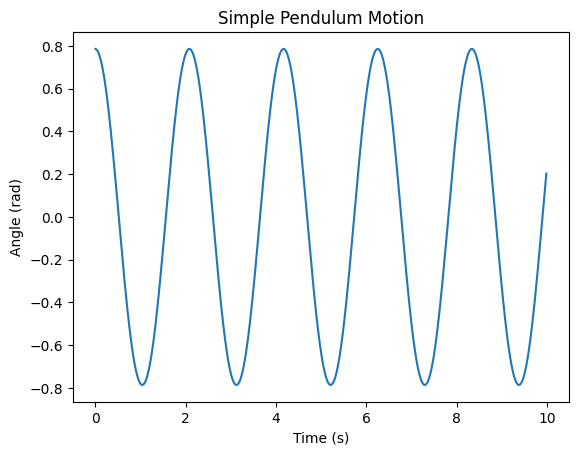

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define constants
g = 9.81  # m/s^2
L = 1.0  # m
m = 1.0  # kg

# Define initial conditions
theta0 = np.pi / 4  # radians
omega0 = 0.0  # rad/s

# Define time range and step size
t_start = 0.0  # s
t_end = 10.0  # s
dt = 0.01  # s

# Define function to calculate the Lagrangian
def lagrangian(theta, omega):
    return 0.5 * m * L**2 * omega**2 - m * g * L * np.cos(theta)

# Define function to calculate the equation of motion
def equation_of_motion(theta, omega):
    return -(g / L) * np.sin(theta)

# Define arrays to store the results
t = np.arange(t_start, t_end, dt)
theta = np.zeros_like(t)
omega = np.zeros_like(t)

# Set initial conditions
theta[0] = theta0
omega[0] = omega0

# Use the Euler-Cromer method to solve the equation of motion
for i in range(len(t) - 1):
    omega[i + 1] = omega[i] + dt * equation_of_motion(theta[i], omega[i])
    theta[i + 1] = theta[i] + dt * omega[i + 1]

# Plot the results
plt.plot(t, theta)
plt.xlabel('Time (s)')
plt.ylabel('Angle (rad)')
plt.title('Simple Pendulum Motion')
plt.show()


In [2]:
import sympy as sp

# Define symbols
t, m, g, l, theta = sp.symbols('t m g l theta')
theta_dot = sp.Function('theta')(t)
theta_ddot = theta_dot.diff(t)

# Define Lagrangian
L = (1/2) * m * l**2 * theta_dot**2 - m * g * l * sp.cos(theta)

# Calculate equation of motion
eq = sp.Eq(sp.diff(L, theta) - sp.diff(sp.diff(L, theta_dot), t), 0)
eq = eq.subs({theta: sp.pi/6, m: 1, g: 9.81, l: 1})

# Solve equation of motion
theta_ddot_sol = sp.solve(eq, theta_ddot)[0]

# Print solution
print(f"The equation of motion for a simple pendulum is: {sp.simplify(theta_ddot_sol)}")


The equation of motion for a simple pendulum is: 4.90500000000000


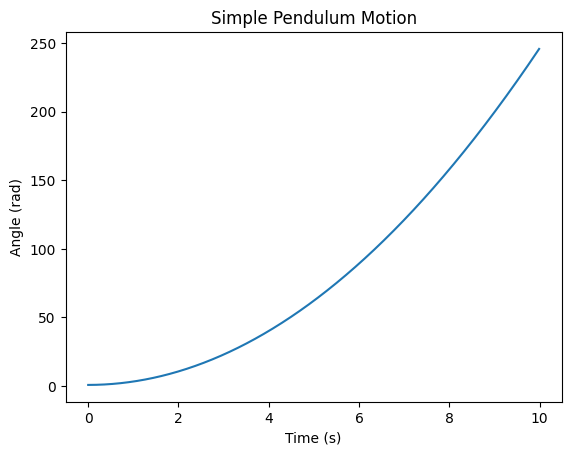

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp

# Define symbols
t, m, g, l, theta = sp.symbols('t m g l theta')
theta_dot = sp.Function('theta')(t)
theta_ddot = theta_dot.diff(t)

# Define Lagrangian
L = (1/2) * m * l**2 * theta_dot**2 - m * g * l * sp.cos(theta)

# Calculate equation of motion
eq = sp.Eq(sp.diff(L, theta) - sp.diff(sp.diff(L, theta_dot), t), 0)
eq = eq.subs({theta: sp.pi/6, m: 1, g: 9.81, l: 1})

# Solve equation of motion
theta_ddot_sol = sp.solve(eq, theta_ddot)[0]

# Define initial conditions
theta_0 = sp.pi/4
theta_dot_0 = 0

# Define time range and step size
t_start = 0
t_end = 10
dt = 0.01

# Define arrays to store results
t_arr = np.arange(t_start, t_end, dt)
theta_arr = np.zeros_like(t_arr)
theta_dot_arr = np.zeros_like(t_arr)

# Set initial conditions
theta_arr[0] = theta_0
theta_dot_arr[0] = theta_dot_0

# Integrate equation of motion
for i in range(1, len(t_arr)):
    theta_ddot_val = theta_ddot_sol.subs({theta_dot: theta_dot_arr[i-1], theta: theta_arr[i-1]})
    theta_dot_arr[i] = theta_dot_arr[i-1] + theta_ddot_val * dt
    theta_arr[i] = theta_arr[i-1] + theta_dot_arr[i] * dt

# Plot results
plt.plot(t_arr, theta_arr)
plt.xlabel('Time (s)')
plt.ylabel('Angle (rad)')
plt.title('Simple Pendulum Motion')
plt.show()
